In [1]:
import nltk
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from stop_words import get_stop_words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.preprocessing import normalize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
with open('data/filtered/tripadvisor_filtered_sent_lemm.pkl' , 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [3]:
df.head()

,rev_id,sentence,lem_sent_token,lem_sent_text
0,0,"Hiking, Food, Fun Love the hiking trails to th...","[hiking, ,, food, ,, fun, love, the, hiking, t...","hiking , food , fun love the hiking trail to t..."
1,0,Amazing panoramic views are perfect for photos...,"[amaze, panoramic, view, be, perfect, for, pho...",amaze panoramic view be perfect for photo to c...
2,0,I fell in love with the cows!!,"[i, fell, in, love, with, the, cow, !, !]",i fell in love with the cow ! !
3,0,Particularly one that followed us up the hill.,"[particularly, one, that, follow, u, up, the, ...",particularly one that follow u up the hill .
4,0,One of my favorite moments was taking selfies ...,"[one, of, my, favorite, moment, be, take, self...",one of my favorite moment be take selfies with...


In [4]:
# create a function to print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [5]:
nltk_stpwd = stopwords.words('english')
stop_words_stpwd = get_stop_words('en')
merged_stopwords = list(set(nltk_stpwd + stop_words_stpwd))
merged_stopwords = merged_stopwords + ['nice','great','year','time','good','friendly', 'deer', 'valley', 'resort',
                                      'fun','day','ticket', 'park', 'city', 'place', 'ski', 'skiing','skier','slope',
                                      'zermatt','matterhorn','cable', 'creek', 'beaver','best','one','run','aspen',
                                      'take']

In [6]:
# TFIDF
vectorizer = TfidfVectorizer(
                         stop_words=merged_stopwords, 
                         token_pattern="\\b[a-z][a-z]+\\b", 
                         min_df=35,
                         max_df=0.7
                        )
counts = vectorizer.fit_transform(df['lem_sent_text'])
feature_names = vectorizer.get_feature_names()

# NMF
components_count = 20

model = NMF(n_components=components_count, init='random', max_iter=100, random_state=101)
topic_distr = model.fit_transform(counts)

In [7]:
print_top_words(model, feature_names, 10)

# topics
# powder: 1
# family: 6
# beginner: 13
# lessons for kids: 11
# scenic views: 17
# food/restaurants: 16
# crowded: 0

Topic #0: lift, line, long, wait, chair, short, minute, slow, ride, open
Topic #1: snow, condition, make, much, powder, fresh, even, season, weather, excellent
Topic #2: love, absolutely, every, come, winter, much, old, son, everything, always
Topic #3: area, small, beautiful, large, big, many, base, huge, also, around
Topic #4: back, come, definitely, next, wait, ca, sure, return, soon, keep
Topic #5: experience, overall, wonderful, amazing, make, fantastic, ever, bad, excellent, level
Topic #6: family, vacation, perfect, whole, friend, trip, child, wonderful, young, holiday
Topic #7: well, worth, groom, maintain, trail, piste, keep, mark, organize, clean
Topic #8: staff, helpful, super, always, excellent, everyone, service, instructor, extremely, rental
Topic #9: mountain, top, coaster, big, ride, trail, small, gondola, bike, side
Topic #10: get, easy, hour, early, around, crowd, way, minute, busy, need
Topic #11: kid, school, lesson, instructor, learn, adult, old, young, age, also
T

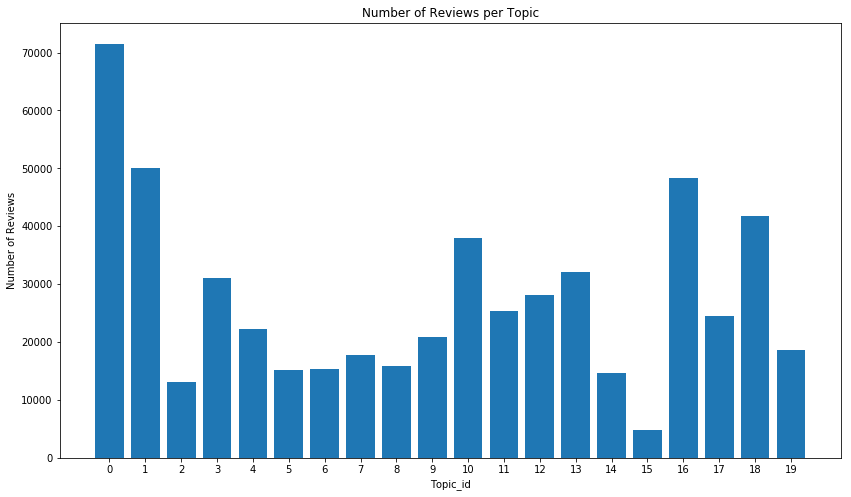

In [8]:
resort_top = np.argmax(topic_distr, axis=1)
np.bincount(resort_top)

plt.figure(figsize=(14,8))
plt.bar(np.arange(0,components_count), height = np.bincount(resort_top))
plt.xlabel('Topic_id')
plt.ylabel('Number of Reviews')
plt.xticks(np.arange(0,components_count))
plt.title('Number of Reviews per Topic');

In [10]:
# print sentences associated with the topic

# Topic #0: lift, line, long, wait, chair, short, minute, slow, ride, open
# Topic #1: snow, condition, make, much, powder, fresh, even, season, weather, excellent
# Topic #2: love, absolutely, every, come, winter, much, old, son, everything, always
# Topic #3: area, small, beautiful, large, big, many, base, huge, also, around
# Topic #4: back, come, definitely, next, wait, ca, sure, return, soon, keep
# Topic #5: experience, overall, wonderful, amazing, make, fantastic, ever, bad, excellent, level
# Topic #6: family, vacation, perfect, whole, friend, trip, child, wonderful, young, holiday
# Topic #7: well, worth, groom, maintain, trail, piste, keep, mark, organize, clean
# Topic #8: staff, helpful, super, always, excellent, everyone, service, instructor, extremely, rental
# Topic #9: mountain, top, coaster, big, ride, trail, small, gondola, bike, side
# Topic #10: get, easy, hour, early, around, crowd, way, minute, busy, need
# Topic #11: kid, school, lesson, instructor, learn, adult, old, young, age, also
# Topic #12: really, enjoy, recommend, like, much, highly, stay, people, everyone, want
# Topic #13: beginner, intermediate, blue, trail, green, level, black, terrain, expert, advanced
# Topic #14: lot, people, parking, terrain, variety, trail, restaurant, level, activity, option
# Topic #15: awesome, instructor, terrain, hill, powder, people, winter, snowboard, school, trail
# Topic #16: food, restaurant, price, lodge, expensive, service, excellent, bar, also, drink
# Topic #17: view, beautiful, top, amazing, spectacular, ride, amaze, fantastic, breathtaking, lake
# Topic #18: first, visit, trip, stay, worth, week, summer, lesson, return, definitely
# Topic #19: go, want, wait, ca, way, week, never, weekend, every, tube

for sent_i in np.argsort(topic_distr[:,11])[-10:]:
    
    print(df.iloc[sent_i,1])
    print("-"*30)

Kids are 12, 10 and 8.
------------------------------
Fun for the kids!
------------------------------
Kid friendly.
------------------------------
It is very kid friendly.
------------------------------
Great time for the kids.
------------------------------
Woodlot was good, but $25 for kids??
------------------------------
FOR KIDS!!!!!
------------------------------
All of this was trumped by the kids.
------------------------------
I kid you not.
------------------------------
Our kids are 17, 11 &8.
------------------------------


In [11]:
# normalize the weights
topics = normalize(topic_distr, norm='l1', axis=1, copy=True, return_norm=False)

topics_df  = pd.DataFrame(data=topics)

In [12]:
df_topics = pd.merge(df, topics_df, left_index=True, right_index=True)

In [13]:
df_topics.head()

,rev_id,sentence,lem_sent_token,lem_sent_text,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,19
0,0,"Hiking, Food, Fun Love the hiking trails to th...","[hiking, ,, food, ,, fun, love, the, hiking, t...","hiking , food , fun love the hiking trail to t...",0.020494,0.002075,0.515779,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.056363,0.007010,0.002829,0.335769,0.007715,0.000000,0.000000
1,0,Amazing panoramic views are perfect for photos...,"[amaze, panoramic, view, be, perfect, for, pho...",amaze panoramic view be perfect for photo to c...,0.000000,0.060796,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.007949,0.000000,0.094148,0.000000,0.000000,0.000000,0.768007,0.014814,0.000000
2,0,I fell in love with the cows!!,"[i, fell, in, love, with, the, cow, !, !]",i fell in love with the cow ! !,0.001149,0.000430,0.996974,0.000000,0.000000,0.000000,...,0.001447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,Particularly one that followed us up the hill.,"[particularly, one, that, follow, u, up, the, ...",particularly one that follow u up the hill .,0.074293,0.022773,0.025456,0.023601,0.002379,0.000257,...,0.110245,0.033243,0.032993,0.354491,0.033788,0.067955,0.043725,0.030571,0.017999,0.047039
4,0,One of my favorite moments was taking selfies ...,"[one, of, my, favorite, moment, be, take, self...",one of my favorite moment be take selfies with...,0.002642,0.033128,0.060233,0.358736,0.009956,0.035027,...,0.000000,0.000000,0.022976,0.007395,0.023498,0.014089,0.000000,0.000000,0.082508,0.034235


In [14]:
df_topics['polarity'] = [TextBlob(sent).sentiment[0] for sent in df_topics['sentence']]

In [15]:
df_topics['subjectivity'] = [TextBlob(sent).sentiment[1] for sent in df_topics['sentence']]

In [16]:
df_topics['sent_score'] = df_topics['polarity'] * df_topics['subjectivity']

In [17]:
# pickle lemmatized sentence file
with open('data/filtered/tripadvisor_filtered_sent_sentiment_score.pkl', 'wb') as picklefile:
    pickle.dump(df_topics, picklefile)

# TSNE

In [18]:
topic_distr_10k = topic_distr[-10000:,:]

In [19]:
doc_plot = TSNE(verbose=1, metric="cosine").fit_transform(topic_distr_10k)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 2.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.763748
[t-SNE] Error after 1000 iterations: 1.197662


In [20]:
rev_max_top = np.argmax(topic_distr_10k, axis=1)

In [21]:
topics = list(range(len(model.components_)))

In [22]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", components_count))

    # We create a scatter plot.
    f = plt.figure(figsize=(16, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(components_count):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    plt.title(f'TSNE Plot with {components_count} topics', size=18)

    return f, ax, sc, txts

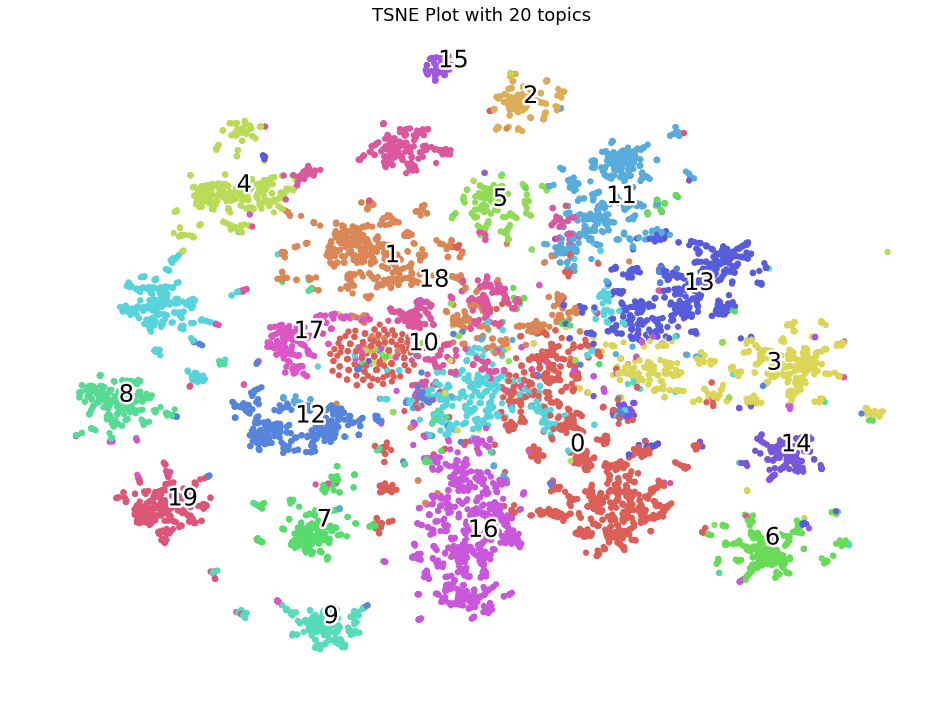

In [23]:
# topics
# powder: 1
# family: 6
# beginner: 13
# lessons for kids: 11
# scenic views: 17
# food/restaurants: 16
# crowded: 0

scatter(doc_plot,rev_max_top);